# <center>Digital Image Processing - Problem Set 4</center>

### Student Names:

### Instructions

This Problem Set covers the topics of Morphological operations, Region filling, Canny edge detection, Hough Transform, Thresholding, Watershed segmentation, $k$-means segmentation.<br>

Your solutions to the following problems should include commented source code and a short description of each function. You should test your functions with several input images, besides the ones provided here. Include the input and output images that you used for experimentation. Analyze your results. If you discover something interesting, let us know!

['crosses', 'noisy_fingerprint', 'cameraman', 'flower', 'moon', 'fingerprint', 'spheres', 'building', 'small_blobs', 'steve_blog']
['mms', 'connected']


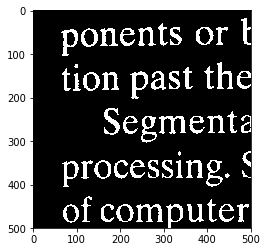

In [52]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from os import listdir, path
%matplotlib inline

pathGray  = "ima/gray"
pathColor = "ima/color"

FilesGray  =  listdir(pathGray)
FilesColor = listdir(pathColor)

grayKeys   = []
colorKeys  = []

img = {
    "gray" :{    },
    "color":{     
    }
}

for i in FilesGray:
    key = i.split(".")[0]
    grayKeys.append(key)
    img["gray"][key] = cv2.imread(pathGray + "/" + i, cv2.IMREAD_GRAYSCALE)

for i in FilesColor:
    key = i.split(".")[0]
    colorKeys.append(key)
    temp = cv2.imread(pathColor + "/" + i, cv2.IMREAD_COLOR)
    img["color"][key] = cv2.cvtColor(temp, cv2.COLOR_BGR2RGB)
    
print(grayKeys)
print(colorKeys)

plt.imshow(img["gray"]["steve_blog"], cmap="gray")
plt.show() 




['crosses.png', 'noisy_fingerprint.jpg', 'cameraman.png', 'flower.jpg', 'moon.jpg', 'mms.jpg', 'connected.jpg', 'fingerprint.jpg', 'spheres.jpg', 'building.jpg', 'small_blobs.jpg', 'steve_blog.png']
['ima/crosses.png0', 'ima/noisy_fingerprint.jpg1', 'ima/cameraman.png2', 'ima/flower.jpg3', 'ima/moon.jpg4', 'ima/mms.jpg5', 'ima/connected.jpg6', 'ima/fingerprint.jpg7', 'ima/spheres.jpg8', 'ima/building.jpg9', 'ima/small_blobs.jpg10', 'ima/steve_blog.png11']


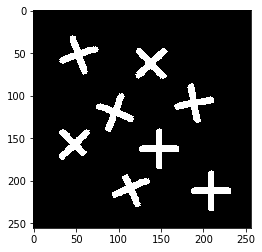

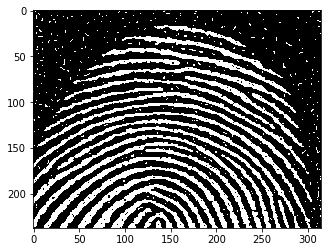

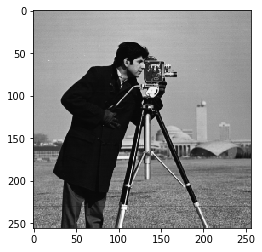

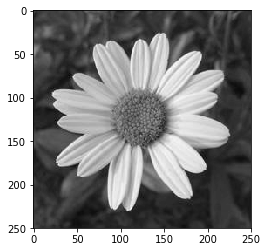

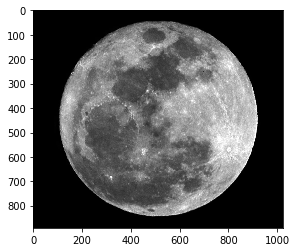

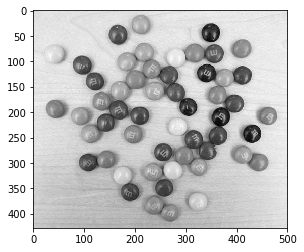

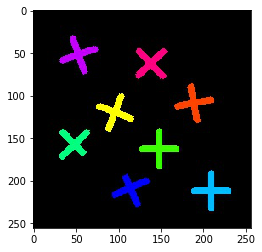

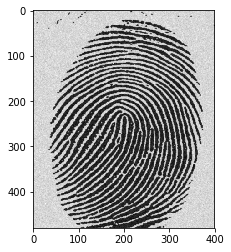

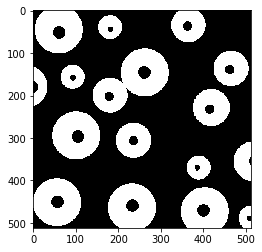

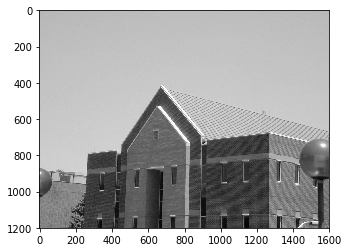

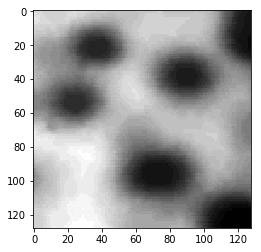

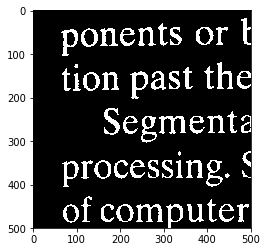

In [21]:
print(images)
images_name = [None]*len(images)
images_name_num = [None]*len(images)
for ind,img in enumerate(images):                #Se crea lista de imagenes
    images_name[ind]="ima/"+img
    images_name_num[ind]="ima/"+img+str(ind)
    if ind == 2 or ind == 6:
        images[ind]=cv2.imread(images_name[ind],cv2.IMREAD_COLOR)
        images[ind]=cv2.cvtColor(images[ind],cv2.COLOR_BGR2RGB)
    else:
        images[ind]=cv2.imread(images_name[ind],cv2.IMREAD_GRAYSCALE)
print(images_name_num)

for i,img in enumerate(images):
    if i == 2 or i == 6:
        plt.imshow(images[i])
    else:
        plt.imshow(images[i],cmap="gray")
    plt.show()

## Problem 1

Write a function that performs the following sequence of morphological operations on a binary image and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Erode the input image.
3. Dilate the result of b.
4. Dilate the result of c.
5. Erode the result of d.

Write a second function that performs the following operations and displays the intermediate and final results.

1. Create a square-shaped structuring element of size 3 by 3.
2. Perform opening of the input image.
3. Compute the closing of the result from b.

Apply both functions to the image <tt>noisy_fingerprint.jpg</tt>. Discuss the differences and similarities between the final results of using both functions.


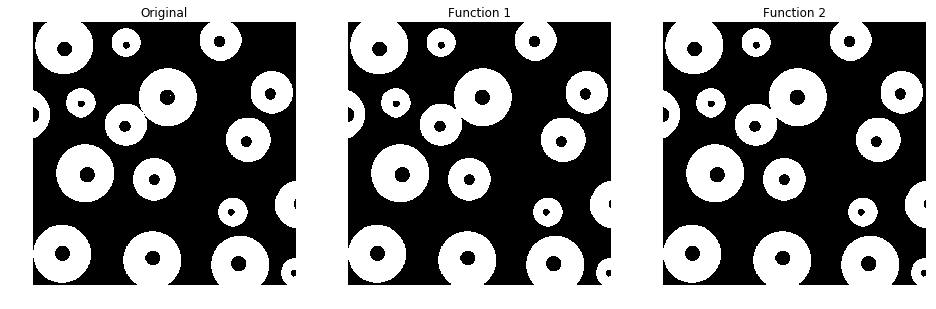

In [16]:
%matplotlib inline
def funct1(img):
    sq=np.ones((3,3))
    img_p=cv2.erode(img,sq)
    img_p=cv2.dilate(img_p,sq,iterations = 2)
    img_p=cv2.erode(img_p,sq)
    return img_p
def funct2(img):
    sq2=np.ones((3,3))
    img_o=cv2.morphologyEx(img,cv2.MORPH_OPEN,sq2)
    img_c=cv2.morphologyEx(img_o,cv2.MORPH_CLOSE,sq2)
    return img_c
img=images[8]
img1=funct1(img)
img2=funct2(img)

plt.figure(figsize=(16,16))
plt.subplot(1,3,1)
plt.imshow(img,cmap="gray")
plt.axis("off")
plt.title("Original")

plt.subplot(1,3,2)
plt.imshow(img1,cmap="gray")
plt.axis("off")
plt.title("Function 1")

plt.subplot(1,3,3)
plt.imshow(img2,cmap="gray")
plt.axis("off")
plt.title("Function 2")

plt.show()

## Problem 2

Write a function that implements the region filling function discussed in class.
In this function you will need to use an interactive plot, so we need to disable <tt>inline</tt> plotting. This can be done with the following code:

In [12]:
%matplotlib tk
# wx, gtk, osx or tk



plt.imshow(img2,cmap="gray")
plt.axis("off")
plt.title("Function 2")

plt.show()




The algorithm should proceed as follows:

1. Open and display the input binary image.
2. Using the <tt>plt.ginput</tt> function, specify a pixel within the region that you want to fill. Record the $(x, y)$ coordinate of the selected pixel.
3. Generate $X_0$, a binary image whose size is equal to the size of the input image. The pixel at the coordinate selected in the previous step should be set to 1, all other pixels should be set to zero.
4. Compute $X_k$ according to the following equation. Repeat until convergence, i.e. $X_k = X_{k-1}$
\begin{equation}
X_k=(X_{k-1} ⊕ B) ∩ A^c
\end{equation}

5. Compute the union between the final $X_k$ and the original image to fill the region.

Apply your function to the image <tt>spheres.jpg</tt> to fill in all the black circles.


In [ ]:
def fill(img,pix):
    X=np.zeros(img.shape)
    X[pix[0],pix[1]]=255
    X_k=np.zeros(img.shape)
    while X_k!=X:
        X=cv2.dilate()

## Problem 3

Connected component labeling (also known as connected component analysis, blob extraction, region labeling, blob discovery, or region extraction) is an algorithm that uniquely labels connected components. The definition of connected components depends on the type of pixel adjacency used (pixel adjacency is defined and described in the book). In this problem, we will look at how the result of a connected component labeling algorithm changes when using 4-adjacency or 8-adjacency.

Write a function, <tt>labelConnectedComponents</tt>, which identifies and labels each connected component in a binary image. The function should take as an input the kind of adjacency to be used (either 4-adjacency or 8-adjacency). The function should also display the resulting connected components as shown below (particular coloring may differ). Apply this function to the images crosses.gif and chessboard.gif. Compare the connected components obtained when using 4-adjacency against those obtained when using 8-adjacency. Please comment your results: are these what you expected?

<b>Hint</b>: Use the functions <tt>cv2.findContours</tt> and <tt>cv2.drawContours</tt>. The following Wikipedia article is also a useful reference:
http://en.wikipedia.org/wiki/Connected_Component_Labeling

<img src="files/crosses.png"/>
<img src="files/connected.jpg"/>

## Problem 4

The blog ‘Steve on Image Processing’ contains useful information about image processing with MATLAB. One of Steve’s posts talks about using morphological operations to identify characters containing a tall vertical segment. The post is at:
http://blogs.mathworks.com/steve/2008/07/14/opening-by-reconstruction/

Replicate the results with Python and OpenCV. You may find that the functions <tt>cv2.findContours</tt> and <tt>cv2.floodFill</tt> are useful for this.

## Problem 5 

Write a function that detects edges in an image using Canny’s method, which is available in the function <tt>cv2.Canny</tt>.
Your function should first smooth the image using a Guassian filter, which you can do with <tt>cv2.GaussianBlur</tt>.
Try out Canny's method with different sizes the smoothing kernel and analyze the results.
Also, try changing the thresholds in the edge detection process. What are the effects of each parameter?

## Problem 6

Write a function that uses the Hough Transform algorithm for line detection. You can use the implementation available in OpenCV <tt>cv2.HoughLines</tt> in your function. Note that this function returns lines in the $(\rho, \theta)$ space, so you need to perform the appropiate conversions before plotting them.

Run the line detection function on an edge map obtained using Canny's method. Display the detected lines on top of the input image. You should use several images for your tests, including <tt>building.jpg</tt>.

## Problem 7

Write a function that implements a simple adaptive thresholding algorithm as described below:

1. Select an initial estimate for $T$. A good initial value for $T$ would be equal to the average of the maximum and minimum intensity value of the image.
2. Threshold the image using $T$. This produces two groups: $G_1$, with pixels whose intensity is equal or less than $T$; and $G_2$, with pixels whose intensity is greater than $T$.
3. Compute the intensity averages $\mu_1$ and $\mu_2$ for the pixels in regions $G_1$ and $G_2$.
4. Compute a new threshold value
\begin{equation}
T=\frac{\mu_1 + \mu_2}{2}
\end{equation}

5. Repeat steps 2-4 until the difference in $T$ between successive iterations is less than a predefined parameter $T_0$.

Apply your function to the image <tt>fingerprint.jpg</tt>. Analyze your results.


## Problem 8

Write a function that uses the $k$-means algorithm to perform image segmentation using RGB pixel colors as features.
Write also a variant of this segmentation approach that uses the H and S components of each pixel represented in the HSI color space. Here, you should use normalized H and S values, so that both variables range between 0 and 1.
Apply your functions to the image <tt>mms.jpg</tt>. Select an appropriate value of $k$.
